In [1]:
# 그래프 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [3]:
# x축 구간 설정을 위한 날짜 리스트
x_data = []
for date in pd.date_range('2017-09-06','2020-09-06',freq='D'):
    if((str(date)[8:10] == '01' ) and (int(str(date)[5:7])%3 == 0 ) ):
        x_data.append(date.strftime("%Y-%m-%d"))

In [4]:
# '홈트' 검색량
client_id = "hbYGwBoqgpV1K6WxEOFP"
client_secret = "WmTrMNWN6c"

url = "https://openapi.naver.com/v1/datalab/search"
body = "{\"startDate\":\"2017-09-06\",\"endDate\":\"2020-09-06\",\"timeUnit\":\"date\", \"keywordGroups\":[{\"groupName\":\"홈트\",\"keywords\":[\"홈트\",\"홈트레이닝\"]}]}"

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    res = (response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)
    
res_json = json.loads(res)
data = res_json['results'][0]['data']
df1 = pd.json_normalize(data)
x = df1.period
y1 = df1.ratio

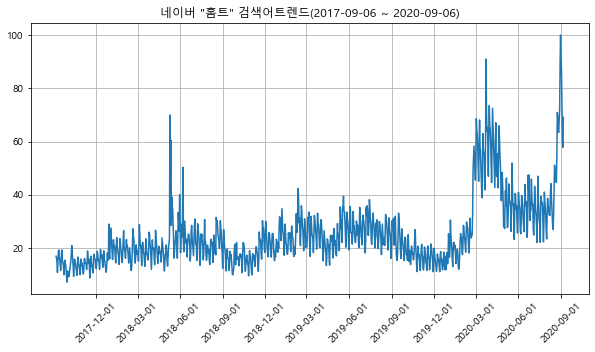

In [14]:
plt.plot(x, y1, label='홈트')
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks(x_data)
plt.xticks(rotation=45)
plt.title('네이버 "홈트" 검색어트렌드(2017-09-06 ~ 2020-09-06)')
plt.grid()
plt.show()

In [6]:
# '자전거' 검색량
body = "{\"startDate\":\"2017-09-06\",\"endDate\":\"2020-09-06\",\"timeUnit\":\"date\", \"keywordGroups\":[{\"groupName\":\"자전거\",\"keywords\":[\"자전거코스\",\"자전거용품\",\"라이딩\"]}]}"

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    res = (response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)
    
res_json = json.loads(res)
data = res_json['results'][0]['data']
df2 = pd.json_normalize(data)
y2 = df2.ratio

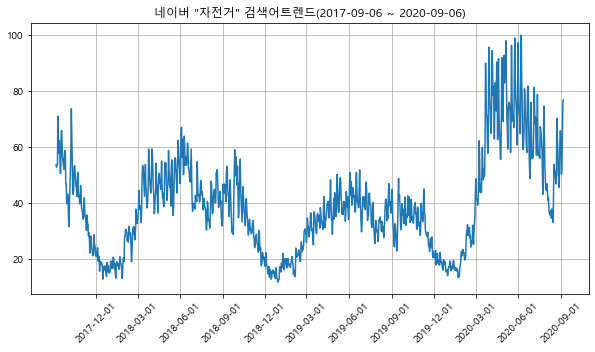

In [15]:
plt.plot(x, y2, label='자전거')
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks(x_data)
plt.xticks(rotation=45)
plt.title('네이버 "자전거" 검색어트렌드(2017-09-06 ~ 2020-09-06)')
plt.grid()
plt.show()

In [8]:
# '캠핑' 검색량
body = "{\"startDate\":\"2017-09-06\",\"endDate\":\"2020-09-06\",\"timeUnit\":\"date\", \"keywordGroups\":[{\"groupName\":\"캠핑\",\"keywords\":[\"캠핑\",\"캠핑용품\"]}]}"

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    res = (response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)
    
res_json = json.loads(res)
data = res_json['results'][0]['data']
df3 = pd.json_normalize(data)
y3 = df3.ratio
x = df3.period


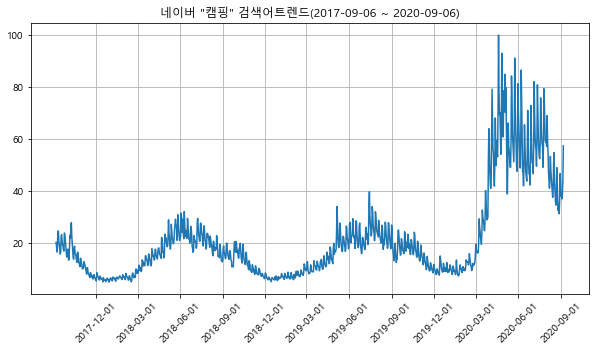

In [16]:
plt.plot(x, y3, label='캠핑')
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks(x_data)
plt.xticks(rotation=45)
plt.title('네이버 "캠핑" 검색어트렌드(2017-09-06 ~ 2020-09-06)')
plt.grid()
plt.show()

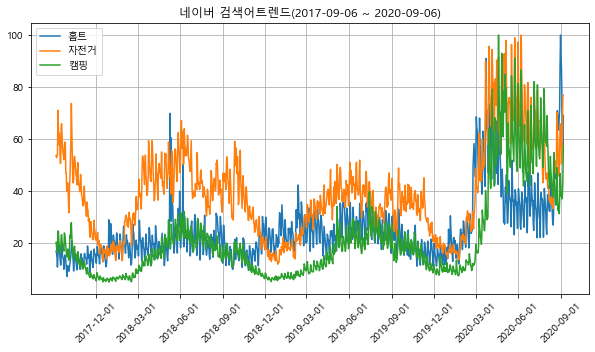

In [17]:
# plt.plot(x, y1, label='홈트', alpha=0.8)
# plt.plot(x, y2, label='자전거', alpha=0.8)
# plt.plot(x, y3, label='캠핑', alpha=0.8)

plt.plot(x, y1, label='홈트')
plt.plot(x, y2, label='자전거')
plt.plot(x, y3, label='캠핑')

plt.rcParams["figure.figsize"] = (10,5)
plt.xticks(x_data)
plt.xticks(rotation=45)
plt.title('네이버 검색어트렌드(2017-09-06 ~ 2020-09-06)')
plt.grid()
plt.legend()
plt.show()